In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path ='/content/drive/My Drive/titanic (6).csv'
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 1. Вивести перших 5 рядків
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# 2. Визначити розмір датасета
print(df.shape)

# 3. Визначити тип даних
print(df.dtypes)


(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# 4. Визначити наявність пропущених значень
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# 5. Замінити пропущені значення на середнє значення для числових стовпців
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)  # Видалення рядків з пропущеними значеннями у Embarked

# 6. Ще раз перевірити наявність пропущених значень
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-1235443244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1235443244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [10]:
# 7. Перевірити наявність дублікатів
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 8. Вивести описову статистику датасету
print(df.describe())

0
       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.653446    0.524184   
std     256.998173    0.486260    0.834700   12.968366    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [11]:
# 9. Видалити стовпчик Cabin
df.drop(columns=['Cabin'], inplace=True)

# 10. Сформувати датасет з обраними стовпцями
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [13]:
#11.Замінити бінарні ознаки (Стать) на 0 і 1 з використанням .loc
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

print(df_selected['Sex'].unique())  # Перевірка унікальних значень


# 12. Ще раз перевірити кількість пропущених даних
print(df_selected.isnull().sum())

[nan]
Survived      0
Pclass        0
Sex         889
Age           0
Fare          0
dtype: int64


In [14]:
# 13. Вивести 5 перших рядків датасету
print(df_selected.head())


# 14. Вивести 5 останніх рядків датасету
print(df_selected.tail())


# 15. Аналіз виживання залежно від статі
survival_by_gender = df_selected.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:\n", survival_by_gender)

   Survived  Pclass  Sex   Age     Fare
0         0       3  NaN  22.0   7.2500
1         1       1  NaN  38.0  71.2833
2         1       3  NaN  26.0   7.9250
3         1       1  NaN  35.0  53.1000
4         0       3  NaN  35.0   8.0500
     Survived  Pclass  Sex        Age   Fare
886         0       2  NaN  27.000000  13.00
887         1       1  NaN  19.000000  30.00
888         0       3  NaN  29.699118  23.45
889         1       1  NaN  26.000000  30.00
890         0       3  NaN  32.000000   7.75
Survival rate by gender:
 Series([], Name: Survived, dtype: float64)


In [15]:
# 16. Відсоток виживання для кожного класу (Pclass)
survival_by_class = df_selected.groupby('Pclass')['Survived'].mean()
print("Survival rate by class:\n", survival_by_class)


Survival rate by class:
 Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [16]:
# 17. Середній вік тих, хто вижив, і тих, хто не вижив
mean_age_survived = df_selected.groupby('Survived')['Age'].mean()
print("Mean age by survival:\n", mean_age_survived)

Mean age by survival:
 Survived
0    30.4151
1    28.4236
Name: Age, dtype: float64


In [17]:
# 18. Розподіл пасажирів на групи за рівнями тарифів і рівень виживання
df_selected.loc[:, 'Fare_Group'] = pd.qcut(df_selected['Fare'], 4)

# Використовуємо observed=False для уникнення попередження FutureWarning
survival_by_fare_group = df_selected.groupby('Fare_Group', observed=False)['Survived'].mean()

print("Survival rate by fare group:\n", survival_by_fare_group)


Survival rate by fare group:
 Fare_Group
(-0.001, 7.896]    0.197309
(7.896, 14.454]    0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.577273
Name: Survived, dtype: float64


/tmp/ipython-input-2668820421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Fare_Group'] = pd.qcut(df_selected['Fare'], 4)


In [18]:
# 19. Середній тариф (Fare) для кожного класу (Pclass)
mean_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()
print("Mean fare by class:\n", mean_fare_by_class)

Mean fare by class:
 Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Mean age by class:
 Pclass
1    36.927073
2    29.866958
3    26.403259
Name: Age, dtype: float64


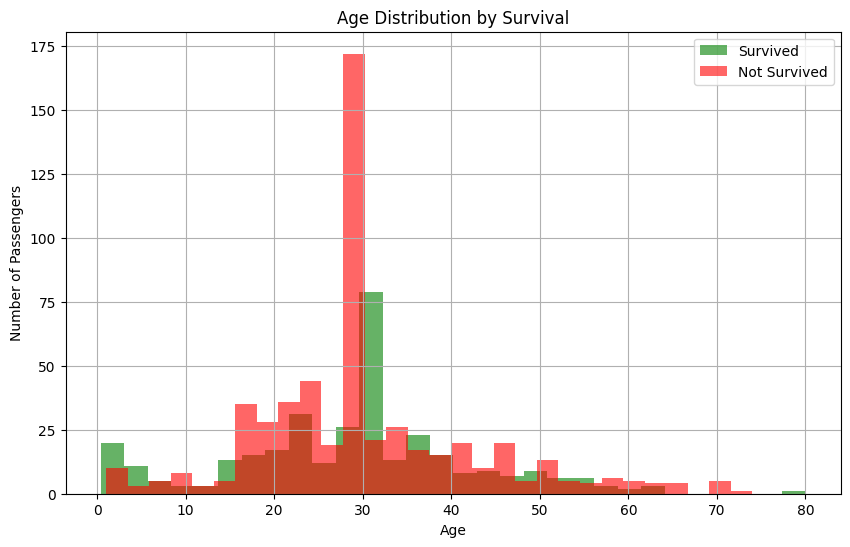

In [19]:

# 20. Середній вік пасажирів для кожного класу (Pclass)
mean_age_by_class = df_selected.groupby('Pclass')['Age'].mean()
print("Mean age by class:\n", mean_age_by_class)

# 21. Побудувати гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_selected[df_selected['Survived'] == 1]['Age'].hist(alpha=0.6, bins=30, color='green', label='Survived')
df_selected[df_selected['Survived'] == 0]['Age'].hist(alpha=0.6, bins=30, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [22]:

# 22. Відсоток виживання для кожної комбінації статі та класу
survival_by_gender_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean()
print("Survival rate by gender and class:\n", survival_by_gender_class)



Survival rate by gender and class:
 Series([], Name: Survived, dtype: float64)


In [23]:
 # 23. Обчислення кореляції між числовими змінними
correlation_matrix = df_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
           Survived    Pclass       Age      Fare
Survived  1.000000 -0.335549 -0.074673  0.255290
Pclass   -0.335549  1.000000 -0.327954 -0.548193
Age      -0.074673 -0.327954  1.000000  0.088604
Fare      0.255290 -0.548193  0.088604  1.000000


Висновок: Найвищі шанси на виживання мали жінки та пасажири першого й другого класів, тоді як чоловіки та пасажири третього класу — значно нижчі. Вік не був вирішальним фактором, але певна перевага спостерігалася у людей середнього віку. Також вища вартість квитка корелювала з більшими шансами на порятунок, що підкреслює соціальну нерівність умов під час катастрофи.